<a href="https://colab.research.google.com/github/karinazablocka/DataScience/blob/master/Neural_Network_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klasyfikator wieloklasowy - Digit Recognition
Spis treści
Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

Import bibliotek

Załadowanie i przygotowanie danych

Eksploracja danych

Budowa sieci neuronowej

Trenowanie modelu

Ocena modelu

Predykcja na podstawie modelu




1. Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)
Celem tego notebook'a jest wstępne zapoznanie się z interfejsem Google Colab oraz budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.

Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).

1.1 Import bibliotek

In [4]:
%tensorflow_version 2.x

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.0.0


1.2 Załadowanie i przygotowanie danych

In [6]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11493376/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [7]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [8]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [9]:
### Standaryzacja - wartości dzielimy przez najwyższą wartość 255 i wszystkie liczby będą w zakresie 0-1

X_train = X_train / 255.
X_test = X_test / 255. 

1.3 Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

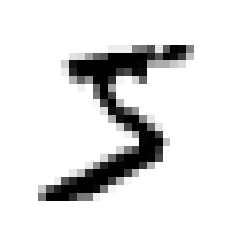

In [11]:
### Wyświetlimy 0 obraz z X_train przy użyciu mathplotlib

plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

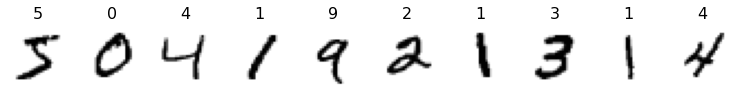

In [13]:
plt.figure(figsize=(13, 13))
for i in range (1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(y_train[i-1],color='black', fontsize=16)
plt.show()

1.4 Budowa sieci neuronowej

model klasyfikacji wieloklasowej


In [14]:
model = Sequential()
### dodajemy warstwę / określamy jej typ / i podajemy rozmiar danych wejściowych
model.add(Flatten(input_shape=(28, 28)))
model.add (Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
### W ostatniej warstwie liczba neuronów musi odpowiadać liczbie klas
model.add(Dense(units=10, activation='softmax'))

###Następnie model musimy skompilować / podać optymalizator 
###/ podać funkcję straty / metrykę względem której będziemy sprawdzać jak dobrze działa model
model.compile(optymizers='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### wyświetlamy budowę modelu
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


1.5 Trenowanie modelu

używamy zestawu treningowego danych

In [15]:
history = model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2912 - accuracy: 0.9158
Epoch 2/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1550 - accuracy: 0.9547
Epoch 3/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1257 - accuracy: 0.9637
Epoch 4/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1106 - accuracy: 0.9695
Epoch 5/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1019 - accuracy: 0.9714


1.6 Ocena modelu

używamy danych testowych

In [16]:
model.evaluate(X_test,y_test, verbose=2)

10000/1 - 1s - loss: 0.0535 - accuracy: 0.9739


[0.10557916981906164, 0.9739]

In [19]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.291156,0.915833
1,0.155043,0.954683
2,0.125681,0.963683
3,0.110556,0.969467
4,0.101872,0.971450


In [21]:
### Rysujemy wykres (plotly) jak wyglądał proces naszego trenowania
fig = make_subplots(rows=2,cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

1.7 Predykcja na podstawie modelu

In [23]:
model.predict(X_test)

array([[0.000000000027, 0.            , 0.000000094659, ..., 0.9999981     , 0.000000000002, 0.000000000557],
       [0.            , 0.000000000003, 1.            , ..., 0.            , 0.000000000017, 0.            ],
       [0.000000001294, 0.99976736    , 0.000024551853, ..., 0.0001324259  , 0.000028633105, 0.000000443758],
       ...,
       [0.            , 0.000000000022, 0.000000000002, ..., 0.000000163118, 0.00000001645 , 0.000023090139],
       [0.            , 0.000000000002, 0.            , ..., 0.            , 0.000000037227, 0.            ],
       [0.            , 0.            , 0.            , ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

In [24]:
y_pred = model.predict_classes(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [26]:
### Tworzymy DataFrame gdzie porównamy y_pred do y_test
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [27]:
### Wskażemy te predykcje które się różnią (bo pierwsze 10 pozycji było dobrze sklasyfikowanych ale nie wiemy co dalej)
misclassfied = pred[pred['y_test']!= pred['y_pred']]
misclassfied.index[:10]

Int64Index([247, 259, 290, 321, 340, 381, 421, 445, 448, 495], dtype='int64')

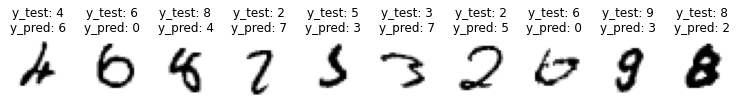

In [29]:
###Dzięki temy przy użyciu mathplotlib możemy sobie wyświetlić te obrazki które zostały źle sklasyfikowane
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassfied.index[:10]):
  plt.subplot(1, 10,i)
  plt.axis('off')
  plt.imshow(X_test[j], cmap='gray_r')
  plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()